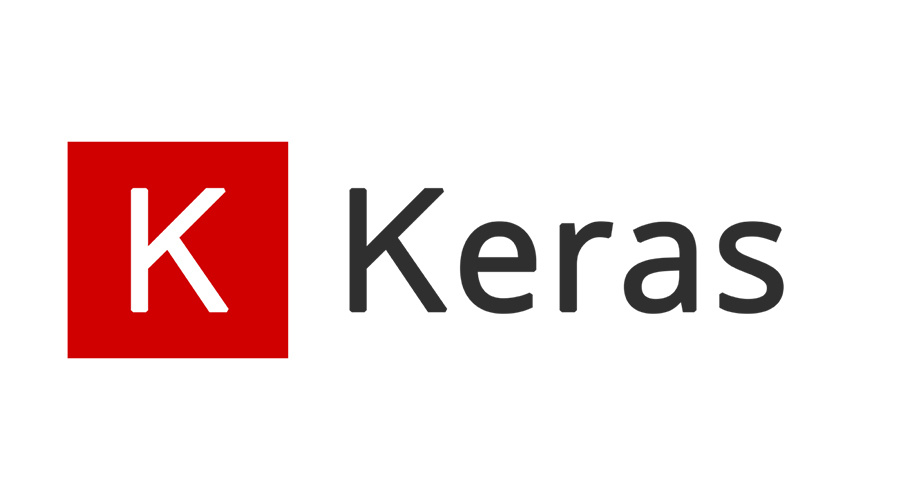

### 40题刷爆Keras，人生苦短我选Keras

原文链接在这里：https://www.kesci.com/home/project/5e1c14582823a10036b474de

1.导入 Keras 库，并打印版本信息

In [7]:
#调整keras的backend为tensorflow
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [8]:
import keras
print(keras.__version__)

2.3.1


## 一、一个简单的例子

使用MLP模型实现手写数字图像MNIST的分类

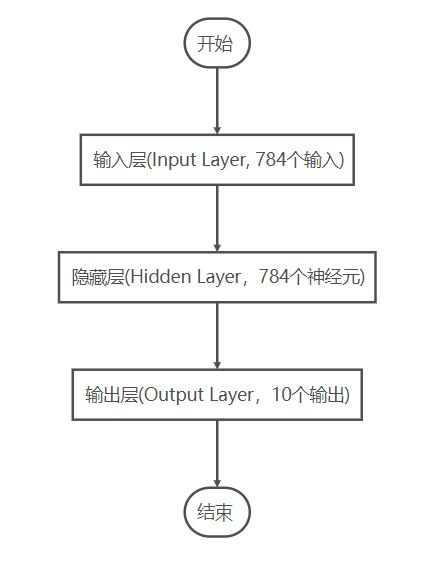

### 1.1 选择模型
2.初始化一个顺序模型(Sequential)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.utils import to_categorical

from keras.layers import Dense,Input, Embedding, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten

In [16]:
model = Sequential()

### 1.2 构建网络
3.为model加入一个784输入(input_dim)，784个输出的隐藏层(unit)，激活函数使用`relu`

In [20]:
model.add(Dense(units=784, activation='relu', input_dim=784))

sigmoid激活函数的公式：

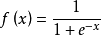

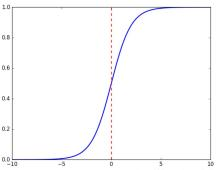

relu激活函数的公式：

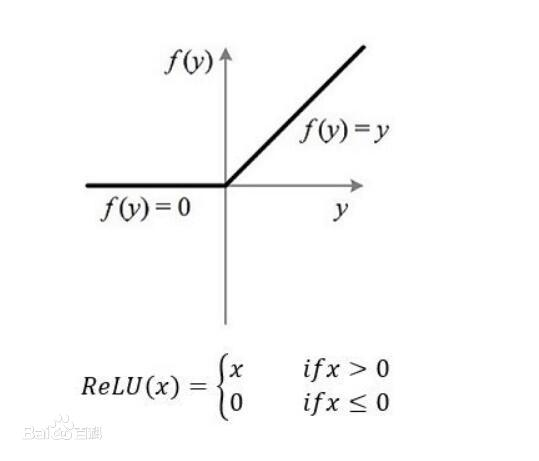

4.在之前的基础上为model加入10个输出的输出层，激活函数使用`softmax`

In [21]:
model.add(Dense(units=10, activation='softmax'))

5.通过`.summary()`查看模型参数情况

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


### 1.3 编译模型

6.使用`.compile()` 来配置学习过程，代价函数`loss`使用`categorical_crossentropy`，优化算法`optimizer`使用`sgd`，性能的指标使用`accuracy`

In [23]:
model.compile(loss = "categorical_crossentropy",optimizer = 'sgd',metrics = ['accuracy'])

### 1.4 训练

读入数据

In [25]:
f = np.load(r'E:\Jupyter\40steps_keras\mnist\mnist.npz')

In [28]:
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']  
f.close() 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


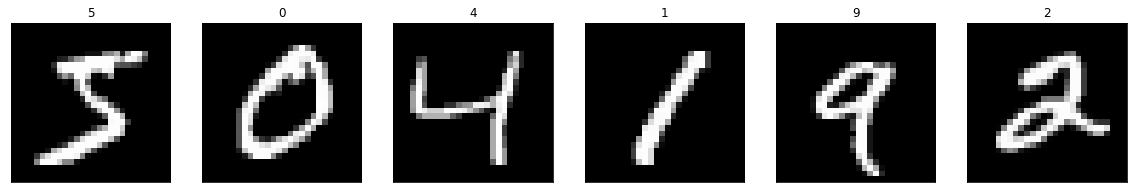

In [29]:
# 可视化查看一下
fig = plt.figure(figsize = (20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6,i + 1, xticks = [], yticks = [])
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]))

In [36]:
# 归一化
x_train=x_train / 255
x_test=x_test / 255

x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)

In [37]:
x_train.shape

(60000, 784)

In [38]:
x_test.shape

(10000, 784)

7.将y值进行one-hot编码

In [39]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

8.将数据送入模型训练

In [44]:
model.fit(x_train, y_train, epochs=1, batch_size=100)

Epoch 1/1
60000/60000 [==============================] - 1549s 26ms/step - loss: 0.4026 - accuracy: 0.8945


9.评估模型性能

In [46]:
score = model.evaluate(x_test,y_test,batch_size=128)

10000/10000 [==============================] - 142s 14ms/step


In [47]:
print("loss",score[0])
print("accu",score[1])

loss 0.35193861265182497
accu 0.9067999720573425


### 1.5 预测

10.使用模型进行预测

In [48]:
model.predict_classes(x_test,batch_size = 128)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### 二、稍微复杂的顺序模型

使用LeNet5实现CIFAR10数据集的分类

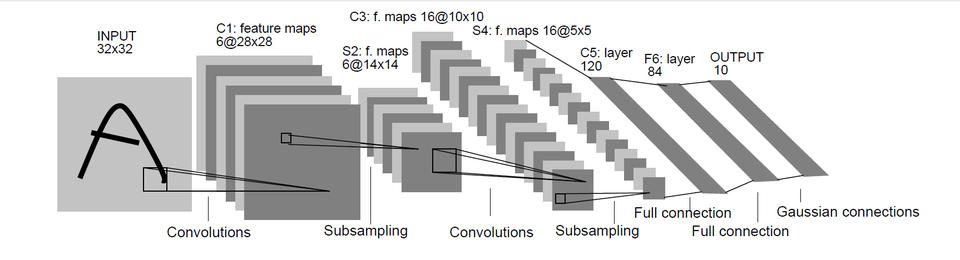

### 2.1 选择模型

11.新建一个顺序模型

In [50]:
Model = Sequential()

### 2.2 构建网络

12.完成INPUT-C1：添加一个二维卷积层，输入为32x32x3，卷积核大小为5x5，核种类6个，并且假设我们不小心漏了relu

In [51]:
Model.add(Conv2D(6, (5, 5), input_shape=(32, 32,3)))

13.刚刚不小心漏了relu，现在可以另外加上

In [52]:
Model.add(Activation('relu'))

14.完成C1-S2：2x2下采样层

In [53]:
Model.add(MaxPooling2D(pool_size=(2, 2)))

15.完成S2-C3：二维卷积，16个内核，5x5的大小，别忘记relu

In [54]:
Model.add(Conv2D(16, (5, 5), activation='relu'))

16.完成C3-S4：2x2下采样层

In [55]:
Model.add(MaxPooling2D(pool_size=(2, 2)))

17.完成S4-C5：先添加平坦层

In [56]:
Model.add(Flatten())

18.再添加全连接层，输出120维，激活函数relu

In [57]:
Model.add(Dense(120, activation='relu'))

19.完成C5-F6：添加全连接层，84个输出，激活函数relu

In [58]:
Model.add(Dense(84, activation='relu'))

20.完成F6-OUTPUT：添加全连接层，10个输出，激活函数softmax

In [59]:
Model.add(Dense(10, activation='softmax'))

打印函数的参数形状

In [60]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

### 2.3编译

21.设置随机梯度下降SGD优化算法的参数，learning_rate=0.01，epoch=25，decay=learning_rate/epoch，momentum=0.9,nesterov=False

In [61]:
from keras.optimizers import SGD

lrate = 0.01
epoch = 10
decay = lrate/epoch
sgd = SGD(lr = lrate,momentum = 0.9, decay = decay,nesterov = False)

23.编译模型，代价函数loss使用categorical_crossentropy，优化算法前面已经定义了，性能的指标使用accuracy

In [62]:
Model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### 2.4 训练

In [63]:
import os
import pickle

batch_size = 4

def load_cifar_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
        Y = np.array(Y)
        return list(zip(X, Y))
def load_cifar(ROOT):
    dataset = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        batch = load_cifar_batch(f)
        dataset.append(batch)
    train_X,train_Y = zip(*np.concatenate(dataset))
    train_X=np.array(train_X)
    train_Y=np.array(train_Y)
    del batch
    test_X,test_Y = zip(*load_cifar_batch(os.path.join(ROOT, 'test_batch')))
    test_X=np.array(test_X)
    test_Y=np.array(test_Y)
    return train_X,train_Y,test_X,test_Y

In [65]:
train_X,train_Y,test_X,test_Y = load_cifar(r'E:\Jupyter\40steps_keras\cifar10')

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


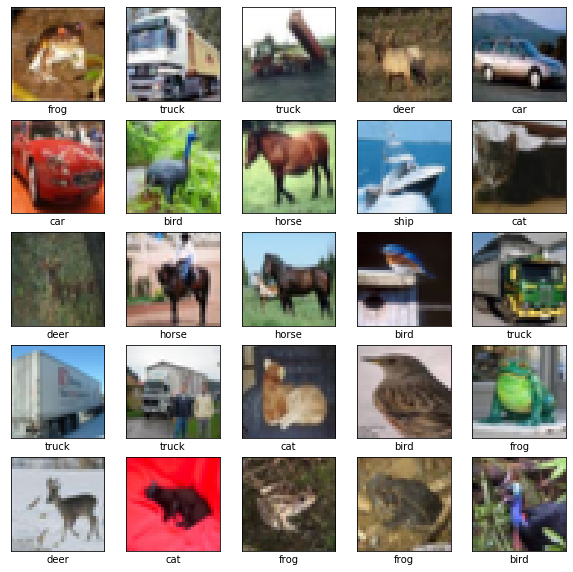

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_Y[i]])
plt.show()

In [67]:
train_X = train_X/255.0
test_X = test_X/255.0

train_Y = to_categorical(train_Y)
test_Y  = to_categorical(test_Y )

24.将数据送入模型，并且设置20%为验证集

In [70]:
history = Model.fit(x=train_X, y=train_Y,validation_split=0.2, epochs=2, batch_size=100, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2


D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


  100/40000 [..............................] - ETA: 3:29:35 - loss: 1.6072 - accuracy: 0.4100

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


  200/40000 [..............................] - ETA: 3:27:43 - loss: 1.5451 - accuracy: 0.4450

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


  300/40000 [..............................] - ETA: 3:27:57 - loss: 1.5764 - accuracy: 0.4167

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


  400/40000 [..............................] - ETA: 3:28:41 - loss: 1.5787 - accuracy: 0.4100

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


  500/40000 [..............................] - ETA: 3:28:08 - loss: 1.5677 - accuracy: 0.4280

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


  600/40000 [..............................] - ETA: 3:27:26 - loss: 1.5996 - accuracy: 0.4217

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


  700/40000 [..............................] - ETA: 3:26:49 - loss: 1.6114 - accuracy: 0.4171

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


  800/40000 [..............................] - ETA: 3:26:32 - loss: 1.6142 - accuracy: 0.4150

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


  900/40000 [..............................] - ETA: 3:25:59 - loss: 1.6146 - accuracy: 0.4189

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 1000/40000 [..............................] - ETA: 3:25:55 - loss: 1.6101 - accuracy: 0.4180

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 1100/40000 [..............................] - ETA: 3:26:21 - loss: 1.6077 - accuracy: 0.4218

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 1200/40000 [..............................] - ETA: 3:26:21 - loss: 1.5999 - accuracy: 0.4208

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 1300/40000 [..............................] - ETA: 3:26:14 - loss: 1.6018 - accuracy: 0.4192

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 1400/40000 [>.............................] - ETA: 3:26:08 - loss: 1.5915 - accuracy: 0.4229

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 1500/40000 [>.............................] - ETA: 3:25:37 - loss: 1.5769 - accuracy: 0.4307

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 1600/40000 [>.............................] - ETA: 3:24:55 - loss: 1.5816 - accuracy: 0.4281

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 1700/40000 [>.............................] - ETA: 3:24:43 - loss: 1.5871 - accuracy: 0.4265

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 1800/40000 [>.............................] - ETA: 3:24:01 - loss: 1.5945 - accuracy: 0.4261

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 1900/40000 [>.............................] - ETA: 3:23:35 - loss: 1.6020 - accuracy: 0.4237

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 2000/40000 [>.............................] - ETA: 3:23:05 - loss: 1.6027 - accuracy: 0.4225

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 2100/40000 [>.............................] - ETA: 3:22:19 - loss: 1.5955 - accuracy: 0.4248

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 2200/40000 [>.............................] - ETA: 3:21:24 - loss: 1.5907 - accuracy: 0.4250

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 2300/40000 [>.............................] - ETA: 3:20:42 - loss: 1.5847 - accuracy: 0.4261

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 2400/40000 [>.............................] - ETA: 3:20:02 - loss: 1.5854 - accuracy: 0.4271

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 2500/40000 [>.............................] - ETA: 3:19:35 - loss: 1.5828 - accuracy: 0.4276

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 2600/40000 [>.............................] - ETA: 3:19:09 - loss: 1.5922 - accuracy: 0.4258

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 2700/40000 [=>............................] - ETA: 3:18:51 - loss: 1.5908 - accuracy: 0.4274

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 2800/40000 [=>............................] - ETA: 3:19:17 - loss: 1.5894 - accuracy: 0.4275

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 2900/40000 [=>............................] - ETA: 3:19:08 - loss: 1.5853 - accuracy: 0.4303

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 3000/40000 [=>............................] - ETA: 3:18:48 - loss: 1.5884 - accuracy: 0.4297

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 3100/40000 [=>............................] - ETA: 3:18:10 - loss: 1.5881 - accuracy: 0.4287

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 3200/40000 [=>............................] - ETA: 3:17:22 - loss: 1.5882 - accuracy: 0.4284

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 3300/40000 [=>............................] - ETA: 3:16:28 - loss: 1.5838 - accuracy: 0.4297

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 3400/40000 [=>............................] - ETA: 3:15:39 - loss: 1.5853 - accuracy: 0.4297

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 3500/40000 [=>............................] - ETA: 3:14:47 - loss: 1.5856 - accuracy: 0.4306

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 3600/40000 [=>............................] - ETA: 3:14:19 - loss: 1.5864 - accuracy: 0.4303

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 3700/40000 [=>............................] - ETA: 3:13:44 - loss: 1.5824 - accuracy: 0.4311

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 3800/40000 [=>............................] - ETA: 3:13:07 - loss: 1.5802 - accuracy: 0.4308

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 3900/40000 [=>............................] - ETA: 3:12:35 - loss: 1.5798 - accuracy: 0.4313

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 4000/40000 [==>...........................] - ETA: 3:12:05 - loss: 1.5815 - accuracy: 0.4310

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 4100/40000 [==>...........................] - ETA: 3:11:35 - loss: 1.5800 - accuracy: 0.4305

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 4200/40000 [==>...........................] - ETA: 3:11:02 - loss: 1.5805 - accuracy: 0.4312

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 4300/40000 [==>...........................] - ETA: 3:10:28 - loss: 1.5847 - accuracy: 0.4300

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 4400/40000 [==>...........................] - ETA: 3:09:45 - loss: 1.5840 - accuracy: 0.4309

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 4500/40000 [==>...........................] - ETA: 3:09:03 - loss: 1.5849 - accuracy: 0.4304

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 4600/40000 [==>...........................] - ETA: 3:08:20 - loss: 1.5862 - accuracy: 0.4309

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 4700/40000 [==>...........................] - ETA: 3:07:42 - loss: 1.5869 - accuracy: 0.4306

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 4800/40000 [==>...........................] - ETA: 3:07:00 - loss: 1.5835 - accuracy: 0.4323

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 4900/40000 [==>...........................] - ETA: 3:06:24 - loss: 1.5794 - accuracy: 0.4339

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 5000/40000 [==>...........................] - ETA: 3:05:46 - loss: 1.5775 - accuracy: 0.4358

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 5100/40000 [==>...........................] - ETA: 3:05:12 - loss: 1.5769 - accuracy: 0.4359

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 5200/40000 [==>...........................] - ETA: 3:04:34 - loss: 1.5752 - accuracy: 0.4371

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 5300/40000 [==>...........................] - ETA: 3:03:58 - loss: 1.5729 - accuracy: 0.4387

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 5400/40000 [===>..........................] - ETA: 3:03:21 - loss: 1.5706 - accuracy: 0.4383

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 5500/40000 [===>..........................] - ETA: 3:02:47 - loss: 1.5697 - accuracy: 0.4396

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 5600/40000 [===>..........................] - ETA: 3:02:16 - loss: 1.5698 - accuracy: 0.4395

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 5700/40000 [===>..........................] - ETA: 3:01:38 - loss: 1.5709 - accuracy: 0.4377

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 5800/40000 [===>..........................] - ETA: 3:01:01 - loss: 1.5707 - accuracy: 0.4374

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 5900/40000 [===>..........................] - ETA: 3:00:32 - loss: 1.5718 - accuracy: 0.4373

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 6000/40000 [===>..........................] - ETA: 2:59:54 - loss: 1.5733 - accuracy: 0.4365

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 6100/40000 [===>..........................] - ETA: 2:59:14 - loss: 1.5738 - accuracy: 0.4356

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 6200/40000 [===>..........................] - ETA: 2:58:34 - loss: 1.5755 - accuracy: 0.4352

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 6300/40000 [===>..........................] - ETA: 2:57:53 - loss: 1.5744 - accuracy: 0.4359

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 6400/40000 [===>..........................] - ETA: 2:57:17 - loss: 1.5724 - accuracy: 0.4363

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 6500/40000 [===>..........................] - ETA: 2:56:39 - loss: 1.5728 - accuracy: 0.4351

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 6600/40000 [===>..........................] - ETA: 2:56:00 - loss: 1.5720 - accuracy: 0.4350

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 6700/40000 [====>.........................] - ETA: 2:55:23 - loss: 1.5714 - accuracy: 0.4343

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 6800/40000 [====>.........................] - ETA: 2:54:45 - loss: 1.5763 - accuracy: 0.4325

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 6900/40000 [====>.........................] - ETA: 2:54:07 - loss: 1.5757 - accuracy: 0.4330

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 7000/40000 [====>.........................] - ETA: 2:53:29 - loss: 1.5760 - accuracy: 0.4329

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 7100/40000 [====>.........................] - ETA: 2:52:58 - loss: 1.5762 - accuracy: 0.4341

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 7200/40000 [====>.........................] - ETA: 2:52:25 - loss: 1.5760 - accuracy: 0.4349

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 7300/40000 [====>.........................] - ETA: 2:51:52 - loss: 1.5732 - accuracy: 0.4366

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 7400/40000 [====>.........................] - ETA: 2:51:19 - loss: 1.5725 - accuracy: 0.4361

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 7500/40000 [====>.........................] - ETA: 2:50:43 - loss: 1.5717 - accuracy: 0.4356

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 7600/40000 [====>.........................] - ETA: 2:50:09 - loss: 1.5716 - accuracy: 0.4353

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 7700/40000 [====>.........................] - ETA: 2:49:39 - loss: 1.5723 - accuracy: 0.4351

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 7800/40000 [====>.........................] - ETA: 2:49:05 - loss: 1.5697 - accuracy: 0.4355

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 7900/40000 [====>.........................] - ETA: 2:48:30 - loss: 1.5710 - accuracy: 0.4358

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 8000/40000 [=====>........................] - ETA: 2:47:55 - loss: 1.5719 - accuracy: 0.4350

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 8100/40000 [=====>........................] - ETA: 2:47:20 - loss: 1.5722 - accuracy: 0.4348

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 8200/40000 [=====>........................] - ETA: 2:46:46 - loss: 1.5710 - accuracy: 0.4351

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 8300/40000 [=====>........................] - ETA: 2:46:10 - loss: 1.5707 - accuracy: 0.4348

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 8400/40000 [=====>........................] - ETA: 2:45:38 - loss: 1.5697 - accuracy: 0.4346

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 8500/40000 [=====>........................] - ETA: 2:45:07 - loss: 1.5687 - accuracy: 0.4352

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 8600/40000 [=====>........................] - ETA: 2:44:35 - loss: 1.5669 - accuracy: 0.4360

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 8700/40000 [=====>........................] - ETA: 2:44:00 - loss: 1.5654 - accuracy: 0.4364

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 8800/40000 [=====>........................] - ETA: 2:43:29 - loss: 1.5614 - accuracy: 0.4376

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 8900/40000 [=====>........................] - ETA: 2:42:54 - loss: 1.5602 - accuracy: 0.4374

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 9000/40000 [=====>........................] - ETA: 2:42:22 - loss: 1.5591 - accuracy: 0.4376

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 9100/40000 [=====>........................] - ETA: 2:41:49 - loss: 1.5598 - accuracy: 0.4367

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 9200/40000 [=====>........................] - ETA: 2:41:20 - loss: 1.5605 - accuracy: 0.4360

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 9300/40000 [=====>........................] - ETA: 2:40:47 - loss: 1.5604 - accuracy: 0.4355

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 9400/40000 [======>.......................] - ETA: 2:40:13 - loss: 1.5607 - accuracy: 0.4353

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 9500/40000 [======>.......................] - ETA: 2:39:39 - loss: 1.5589 - accuracy: 0.4364

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 9600/40000 [======>.......................] - ETA: 2:39:05 - loss: 1.5583 - accuracy: 0.4366

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 9700/40000 [======>.......................] - ETA: 2:38:33 - loss: 1.5579 - accuracy: 0.4365

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 9800/40000 [======>.......................] - ETA: 2:38:01 - loss: 1.5571 - accuracy: 0.4367

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


 9900/40000 [======>.......................] - ETA: 2:37:30 - loss: 1.5588 - accuracy: 0.4369

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


10000/40000 [======>.......................] - ETA: 2:36:57 - loss: 1.5582 - accuracy: 0.4365

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


10100/40000 [======>.......................] - ETA: 2:36:23 - loss: 1.5590 - accuracy: 0.4362

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


10200/40000 [======>.......................] - ETA: 2:35:49 - loss: 1.5571 - accuracy: 0.4366

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


10300/40000 [======>.......................] - ETA: 2:35:21 - loss: 1.5546 - accuracy: 0.4376

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


10400/40000 [======>.......................] - ETA: 2:34:51 - loss: 1.5549 - accuracy: 0.4376

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


10500/40000 [======>.......................] - ETA: 2:34:19 - loss: 1.5539 - accuracy: 0.4385

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


10600/40000 [======>.......................] - ETA: 2:33:47 - loss: 1.5528 - accuracy: 0.4386

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


10700/40000 [=======>......................] - ETA: 2:33:12 - loss: 1.5531 - accuracy: 0.4389

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


10800/40000 [=======>......................] - ETA: 2:32:37 - loss: 1.5527 - accuracy: 0.4387

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


10900/40000 [=======>......................] - ETA: 2:32:14 - loss: 1.5519 - accuracy: 0.4388

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


11000/40000 [=======>......................] - ETA: 2:31:42 - loss: 1.5524 - accuracy: 0.4383

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


11100/40000 [=======>......................] - ETA: 2:31:10 - loss: 1.5513 - accuracy: 0.4386

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


11200/40000 [=======>......................] - ETA: 2:30:41 - loss: 1.5511 - accuracy: 0.4382

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


11300/40000 [=======>......................] - ETA: 2:30:15 - loss: 1.5507 - accuracy: 0.4382

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


11400/40000 [=======>......................] - ETA: 2:30:00 - loss: 1.5512 - accuracy: 0.4383

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


11500/40000 [=======>......................] - ETA: 2:29:34 - loss: 1.5520 - accuracy: 0.4383

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


11600/40000 [=======>......................] - ETA: 2:29:06 - loss: 1.5528 - accuracy: 0.4378

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


11700/40000 [=======>......................] - ETA: 2:28:32 - loss: 1.5531 - accuracy: 0.4371

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


11800/40000 [=======>......................] - ETA: 2:28:03 - loss: 1.5536 - accuracy: 0.4369

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


11900/40000 [=======>......................] - ETA: 2:27:33 - loss: 1.5539 - accuracy: 0.4361

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


12000/40000 [========>.....................] - ETA: 2:27:03 - loss: 1.5534 - accuracy: 0.4366

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


12100/40000 [========>.....................] - ETA: 2:26:33 - loss: 1.5534 - accuracy: 0.4362

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


12200/40000 [========>.....................] - ETA: 2:26:06 - loss: 1.5535 - accuracy: 0.4363

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


12300/40000 [========>.....................] - ETA: 2:25:46 - loss: 1.5531 - accuracy: 0.4367

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


12400/40000 [========>.....................] - ETA: 2:25:17 - loss: 1.5526 - accuracy: 0.4365

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


12500/40000 [========>.....................] - ETA: 2:24:43 - loss: 1.5508 - accuracy: 0.4372

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


12600/40000 [========>.....................] - ETA: 2:24:07 - loss: 1.5502 - accuracy: 0.4375

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


12700/40000 [========>.....................] - ETA: 2:23:30 - loss: 1.5509 - accuracy: 0.4374

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


12800/40000 [========>.....................] - ETA: 2:22:55 - loss: 1.5501 - accuracy: 0.4376

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


12900/40000 [========>.....................] - ETA: 2:22:21 - loss: 1.5499 - accuracy: 0.4377

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


13000/40000 [========>.....................] - ETA: 2:21:47 - loss: 1.5490 - accuracy: 0.4378

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


13100/40000 [========>.....................] - ETA: 2:21:11 - loss: 1.5488 - accuracy: 0.4381

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


13200/40000 [========>.....................] - ETA: 2:20:35 - loss: 1.5485 - accuracy: 0.4383

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


13300/40000 [========>.....................] - ETA: 2:20:00 - loss: 1.5482 - accuracy: 0.4381

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


13400/40000 [=========>....................] - ETA: 2:19:28 - loss: 1.5471 - accuracy: 0.4382

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


13500/40000 [=========>....................] - ETA: 2:18:56 - loss: 1.5457 - accuracy: 0.4394

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


13600/40000 [=========>....................] - ETA: 2:18:21 - loss: 1.5451 - accuracy: 0.4400

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


13700/40000 [=========>....................] - ETA: 2:17:46 - loss: 1.5436 - accuracy: 0.4404

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


13800/40000 [=========>....................] - ETA: 2:17:12 - loss: 1.5447 - accuracy: 0.4402

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


13900/40000 [=========>....................] - ETA: 2:16:37 - loss: 1.5448 - accuracy: 0.4402

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


14000/40000 [=========>....................] - ETA: 2:16:04 - loss: 1.5459 - accuracy: 0.4399

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


14100/40000 [=========>....................] - ETA: 2:15:30 - loss: 1.5445 - accuracy: 0.4402

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


14200/40000 [=========>....................] - ETA: 2:14:56 - loss: 1.5444 - accuracy: 0.4402

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


14300/40000 [=========>....................] - ETA: 2:14:21 - loss: 1.5440 - accuracy: 0.4403

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


14400/40000 [=========>....................] - ETA: 2:13:47 - loss: 1.5437 - accuracy: 0.4404

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


14500/40000 [=========>....................] - ETA: 2:13:13 - loss: 1.5424 - accuracy: 0.4406

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


14600/40000 [=========>....................] - ETA: 2:12:39 - loss: 1.5425 - accuracy: 0.4402

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


14700/40000 [==========>...................] - ETA: 2:12:05 - loss: 1.5428 - accuracy: 0.4399

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


14800/40000 [==========>...................] - ETA: 2:11:31 - loss: 1.5417 - accuracy: 0.4403

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


14900/40000 [==========>...................] - ETA: 2:10:58 - loss: 1.5426 - accuracy: 0.4403

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


15000/40000 [==========>...................] - ETA: 2:10:23 - loss: 1.5419 - accuracy: 0.4403

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


15100/40000 [==========>...................] - ETA: 2:09:49 - loss: 1.5413 - accuracy: 0.4408

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


15200/40000 [==========>...................] - ETA: 2:09:15 - loss: 1.5416 - accuracy: 0.4402

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


15300/40000 [==========>...................] - ETA: 2:08:41 - loss: 1.5418 - accuracy: 0.4402

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


15400/40000 [==========>...................] - ETA: 2:08:07 - loss: 1.5419 - accuracy: 0.4402

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


15500/40000 [==========>...................] - ETA: 2:07:34 - loss: 1.5429 - accuracy: 0.4397

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


15600/40000 [==========>...................] - ETA: 2:07:01 - loss: 1.5424 - accuracy: 0.4400

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


15700/40000 [==========>...................] - ETA: 2:06:28 - loss: 1.5424 - accuracy: 0.4400

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


15800/40000 [==========>...................] - ETA: 2:05:55 - loss: 1.5418 - accuracy: 0.4399

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


15900/40000 [==========>...................] - ETA: 2:05:21 - loss: 1.5416 - accuracy: 0.4399

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


16000/40000 [===========>..................] - ETA: 2:04:49 - loss: 1.5413 - accuracy: 0.4400

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


16100/40000 [===========>..................] - ETA: 2:04:18 - loss: 1.5412 - accuracy: 0.4401

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


16200/40000 [===========>..................] - ETA: 2:03:48 - loss: 1.5408 - accuracy: 0.4402

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


16300/40000 [===========>..................] - ETA: 2:03:18 - loss: 1.5395 - accuracy: 0.4404

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


16400/40000 [===========>..................] - ETA: 2:02:48 - loss: 1.5396 - accuracy: 0.4404

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


16500/40000 [===========>..................] - ETA: 2:02:18 - loss: 1.5397 - accuracy: 0.4402

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


16600/40000 [===========>..................] - ETA: 2:01:48 - loss: 1.5396 - accuracy: 0.4404

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


16700/40000 [===========>..................] - ETA: 2:01:17 - loss: 1.5394 - accuracy: 0.4407

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


16800/40000 [===========>..................] - ETA: 2:00:47 - loss: 1.5393 - accuracy: 0.4406

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


16900/40000 [===========>..................] - ETA: 2:00:18 - loss: 1.5391 - accuracy: 0.4403

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


17000/40000 [===========>..................] - ETA: 1:59:49 - loss: 1.5390 - accuracy: 0.4405

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


17100/40000 [===========>..................] - ETA: 1:59:23 - loss: 1.5381 - accuracy: 0.4407

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


17200/40000 [===========>..................] - ETA: 1:58:56 - loss: 1.5382 - accuracy: 0.4405

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


17300/40000 [===========>..................] - ETA: 1:58:27 - loss: 1.5374 - accuracy: 0.4409

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


17400/40000 [============>.................] - ETA: 1:57:56 - loss: 1.5370 - accuracy: 0.4411

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


17500/40000 [============>.................] - ETA: 1:57:26 - loss: 1.5365 - accuracy: 0.4413

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


17600/40000 [============>.................] - ETA: 1:56:53 - loss: 1.5366 - accuracy: 0.4413

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


17700/40000 [============>.................] - ETA: 1:56:20 - loss: 1.5363 - accuracy: 0.4414

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


17800/40000 [============>.................] - ETA: 1:55:48 - loss: 1.5358 - accuracy: 0.4414

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


17900/40000 [============>.................] - ETA: 1:55:17 - loss: 1.5361 - accuracy: 0.4413

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


18000/40000 [============>.................] - ETA: 1:54:51 - loss: 1.5367 - accuracy: 0.4417

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


18100/40000 [============>.................] - ETA: 1:54:20 - loss: 1.5371 - accuracy: 0.4417

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


18200/40000 [============>.................] - ETA: 1:53:48 - loss: 1.5366 - accuracy: 0.4419

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


18300/40000 [============>.................] - ETA: 1:53:16 - loss: 1.5358 - accuracy: 0.4419

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


18400/40000 [============>.................] - ETA: 1:52:46 - loss: 1.5357 - accuracy: 0.4421

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


18500/40000 [============>.................] - ETA: 1:52:14 - loss: 1.5355 - accuracy: 0.4421

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


18600/40000 [============>.................] - ETA: 1:51:43 - loss: 1.5358 - accuracy: 0.4421

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


18700/40000 [=============>................] - ETA: 1:51:16 - loss: 1.5361 - accuracy: 0.4418

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


18800/40000 [=============>................] - ETA: 1:50:43 - loss: 1.5355 - accuracy: 0.4421

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


18900/40000 [=============>................] - ETA: 1:50:11 - loss: 1.5350 - accuracy: 0.4423

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


19000/40000 [=============>................] - ETA: 1:49:38 - loss: 1.5348 - accuracy: 0.4427

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


19100/40000 [=============>................] - ETA: 1:49:06 - loss: 1.5353 - accuracy: 0.4426

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


19200/40000 [=============>................] - ETA: 1:48:33 - loss: 1.5354 - accuracy: 0.4427

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


19300/40000 [=============>................] - ETA: 1:48:01 - loss: 1.5349 - accuracy: 0.4425

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


19400/40000 [=============>................] - ETA: 1:47:29 - loss: 1.5344 - accuracy: 0.4428

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


19500/40000 [=============>................] - ETA: 1:46:57 - loss: 1.5340 - accuracy: 0.4430

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


19600/40000 [=============>................] - ETA: 1:46:24 - loss: 1.5338 - accuracy: 0.4433

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


19700/40000 [=============>................] - ETA: 1:45:52 - loss: 1.5335 - accuracy: 0.4435

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


19800/40000 [=============>................] - ETA: 1:45:20 - loss: 1.5333 - accuracy: 0.4436

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


19900/40000 [=============>................] - ETA: 1:44:47 - loss: 1.5336 - accuracy: 0.4432

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


20000/40000 [==============>...............] - ETA: 1:44:15 - loss: 1.5335 - accuracy: 0.4433

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


20100/40000 [==============>...............] - ETA: 1:43:43 - loss: 1.5336 - accuracy: 0.4435

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


20200/40000 [==============>...............] - ETA: 1:43:11 - loss: 1.5338 - accuracy: 0.4435

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


20300/40000 [==============>...............] - ETA: 1:42:39 - loss: 1.5339 - accuracy: 0.4434

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


20400/40000 [==============>...............] - ETA: 1:42:08 - loss: 1.5336 - accuracy: 0.4437

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


20500/40000 [==============>...............] - ETA: 1:41:36 - loss: 1.5334 - accuracy: 0.4439

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


20600/40000 [==============>...............] - ETA: 1:41:03 - loss: 1.5330 - accuracy: 0.4439

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


20700/40000 [==============>...............] - ETA: 1:40:31 - loss: 1.5331 - accuracy: 0.4438

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


20800/40000 [==============>...............] - ETA: 1:39:58 - loss: 1.5332 - accuracy: 0.4435

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


20900/40000 [==============>...............] - ETA: 1:39:26 - loss: 1.5327 - accuracy: 0.4437

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


21000/40000 [==============>...............] - ETA: 1:38:53 - loss: 1.5325 - accuracy: 0.4438

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


21100/40000 [==============>...............] - ETA: 1:38:21 - loss: 1.5325 - accuracy: 0.4438

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


21200/40000 [==============>...............] - ETA: 1:37:48 - loss: 1.5323 - accuracy: 0.4436

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


21300/40000 [==============>...............] - ETA: 1:37:16 - loss: 1.5336 - accuracy: 0.4432

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


21400/40000 [===============>..............] - ETA: 1:36:44 - loss: 1.5334 - accuracy: 0.4431

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


21500/40000 [===============>..............] - ETA: 1:36:11 - loss: 1.5334 - accuracy: 0.4433

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


21600/40000 [===============>..............] - ETA: 1:35:39 - loss: 1.5327 - accuracy: 0.4436

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


21700/40000 [===============>..............] - ETA: 1:35:07 - loss: 1.5320 - accuracy: 0.4440

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


21800/40000 [===============>..............] - ETA: 1:34:35 - loss: 1.5316 - accuracy: 0.4439

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


21900/40000 [===============>..............] - ETA: 1:34:03 - loss: 1.5323 - accuracy: 0.4437

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


22000/40000 [===============>..............] - ETA: 1:33:31 - loss: 1.5318 - accuracy: 0.4440

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


22100/40000 [===============>..............] - ETA: 1:32:58 - loss: 1.5317 - accuracy: 0.4440

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


22200/40000 [===============>..............] - ETA: 1:32:26 - loss: 1.5317 - accuracy: 0.4440

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


22300/40000 [===============>..............] - ETA: 1:31:54 - loss: 1.5319 - accuracy: 0.4438

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


22400/40000 [===============>..............] - ETA: 1:31:21 - loss: 1.5315 - accuracy: 0.4440

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


22500/40000 [===============>..............] - ETA: 1:30:49 - loss: 1.5315 - accuracy: 0.4438

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


22600/40000 [===============>..............] - ETA: 1:30:17 - loss: 1.5313 - accuracy: 0.4439

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


22700/40000 [================>.............] - ETA: 1:29:44 - loss: 1.5311 - accuracy: 0.4442

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


22800/40000 [================>.............] - ETA: 1:29:12 - loss: 1.5302 - accuracy: 0.4445

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


22900/40000 [================>.............] - ETA: 1:28:40 - loss: 1.5306 - accuracy: 0.4445

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


23000/40000 [================>.............] - ETA: 1:28:07 - loss: 1.5299 - accuracy: 0.4448

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


23100/40000 [================>.............] - ETA: 1:27:35 - loss: 1.5299 - accuracy: 0.4449

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


23200/40000 [================>.............] - ETA: 1:27:03 - loss: 1.5295 - accuracy: 0.4450

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


23300/40000 [================>.............] - ETA: 1:26:32 - loss: 1.5291 - accuracy: 0.4450

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


23400/40000 [================>.............] - ETA: 1:26:00 - loss: 1.5291 - accuracy: 0.4451

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


23500/40000 [================>.............] - ETA: 1:25:28 - loss: 1.5290 - accuracy: 0.4452

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


23600/40000 [================>.............] - ETA: 1:24:57 - loss: 1.5282 - accuracy: 0.4457

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


23700/40000 [================>.............] - ETA: 1:24:25 - loss: 1.5282 - accuracy: 0.4459

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


23800/40000 [================>.............] - ETA: 1:23:54 - loss: 1.5279 - accuracy: 0.4460

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


23900/40000 [================>.............] - ETA: 1:23:22 - loss: 1.5273 - accuracy: 0.4462

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


24000/40000 [=================>............] - ETA: 1:22:50 - loss: 1.5272 - accuracy: 0.4459

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


24100/40000 [=================>............] - ETA: 1:22:19 - loss: 1.5269 - accuracy: 0.4458

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


24200/40000 [=================>............] - ETA: 1:21:47 - loss: 1.5261 - accuracy: 0.4459

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


24300/40000 [=================>............] - ETA: 1:21:16 - loss: 1.5261 - accuracy: 0.4460

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


24400/40000 [=================>............] - ETA: 1:20:45 - loss: 1.5260 - accuracy: 0.4461

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


24500/40000 [=================>............] - ETA: 1:20:13 - loss: 1.5258 - accuracy: 0.4461

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


24600/40000 [=================>............] - ETA: 1:19:42 - loss: 1.5264 - accuracy: 0.4459

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


24700/40000 [=================>............] - ETA: 1:19:11 - loss: 1.5257 - accuracy: 0.4458

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


24800/40000 [=================>............] - ETA: 1:18:40 - loss: 1.5253 - accuracy: 0.4461

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


24900/40000 [=================>............] - ETA: 1:18:08 - loss: 1.5255 - accuracy: 0.4463

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


25000/40000 [=================>............] - ETA: 1:17:36 - loss: 1.5253 - accuracy: 0.4464

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


25100/40000 [=================>............] - ETA: 1:17:05 - loss: 1.5251 - accuracy: 0.4465

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


25200/40000 [=================>............] - ETA: 1:16:34 - loss: 1.5248 - accuracy: 0.4466

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


25300/40000 [=================>............] - ETA: 1:16:02 - loss: 1.5252 - accuracy: 0.4467

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


25400/40000 [==================>...........] - ETA: 1:15:31 - loss: 1.5247 - accuracy: 0.4467

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


25500/40000 [==================>...........] - ETA: 1:14:59 - loss: 1.5242 - accuracy: 0.4469

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


25600/40000 [==================>...........] - ETA: 1:14:28 - loss: 1.5243 - accuracy: 0.4472

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


25700/40000 [==================>...........] - ETA: 1:13:56 - loss: 1.5239 - accuracy: 0.4472

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


25800/40000 [==================>...........] - ETA: 1:13:24 - loss: 1.5239 - accuracy: 0.4470

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


25900/40000 [==================>...........] - ETA: 1:12:53 - loss: 1.5239 - accuracy: 0.4470

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


26000/40000 [==================>...........] - ETA: 1:12:22 - loss: 1.5240 - accuracy: 0.4471

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


26100/40000 [==================>...........] - ETA: 1:11:51 - loss: 1.5244 - accuracy: 0.4469

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


26200/40000 [==================>...........] - ETA: 1:11:20 - loss: 1.5235 - accuracy: 0.4472

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


26300/40000 [==================>...........] - ETA: 1:10:49 - loss: 1.5234 - accuracy: 0.4471

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


26400/40000 [==================>...........] - ETA: 1:10:18 - loss: 1.5229 - accuracy: 0.4472

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


26500/40000 [==================>...........] - ETA: 1:09:47 - loss: 1.5227 - accuracy: 0.4473

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


26600/40000 [==================>...........] - ETA: 1:09:16 - loss: 1.5223 - accuracy: 0.4477

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


26700/40000 [===================>..........] - ETA: 1:08:45 - loss: 1.5220 - accuracy: 0.4476

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


26800/40000 [===================>..........] - ETA: 1:08:14 - loss: 1.5218 - accuracy: 0.4476

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


26900/40000 [===================>..........] - ETA: 1:07:42 - loss: 1.5220 - accuracy: 0.4475

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


27000/40000 [===================>..........] - ETA: 1:07:11 - loss: 1.5217 - accuracy: 0.4474

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


27100/40000 [===================>..........] - ETA: 1:06:39 - loss: 1.5215 - accuracy: 0.4474

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


27200/40000 [===================>..........] - ETA: 1:06:08 - loss: 1.5214 - accuracy: 0.4475

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


27300/40000 [===================>..........] - ETA: 1:05:36 - loss: 1.5215 - accuracy: 0.4477

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


27400/40000 [===================>..........] - ETA: 1:05:04 - loss: 1.5213 - accuracy: 0.4477

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


27500/40000 [===================>..........] - ETA: 1:04:33 - loss: 1.5213 - accuracy: 0.4476

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


27600/40000 [===================>..........] - ETA: 1:04:01 - loss: 1.5215 - accuracy: 0.4475

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


27700/40000 [===================>..........] - ETA: 1:03:30 - loss: 1.5209 - accuracy: 0.4476

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


27800/40000 [===================>..........] - ETA: 1:02:58 - loss: 1.5208 - accuracy: 0.4478

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


27900/40000 [===================>..........] - ETA: 1:02:27 - loss: 1.5212 - accuracy: 0.4475

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


28000/40000 [====================>.........] - ETA: 1:01:55 - loss: 1.5208 - accuracy: 0.4474

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


28100/40000 [====================>.........] - ETA: 1:01:24 - loss: 1.5206 - accuracy: 0.4475

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


28200/40000 [====================>.........] - ETA: 1:00:52 - loss: 1.5212 - accuracy: 0.4475

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


28300/40000 [====================>.........] - ETA: 1:00:21 - loss: 1.5209 - accuracy: 0.4474

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


28400/40000 [====================>.........] - ETA: 59:49 - loss: 1.5213 - accuracy: 0.4474  

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


28500/40000 [====================>.........] - ETA: 59:18 - loss: 1.5216 - accuracy: 0.4474

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


28600/40000 [====================>.........] - ETA: 58:47 - loss: 1.5214 - accuracy: 0.4474

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


28700/40000 [====================>.........] - ETA: 58:15 - loss: 1.5218 - accuracy: 0.4472

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


28800/40000 [====================>.........] - ETA: 57:44 - loss: 1.5217 - accuracy: 0.4471

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


28900/40000 [====================>.........] - ETA: 57:13 - loss: 1.5220 - accuracy: 0.4471

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


29000/40000 [====================>.........] - ETA: 56:41 - loss: 1.5218 - accuracy: 0.4471

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


29100/40000 [====================>.........] - ETA: 56:10 - loss: 1.5218 - accuracy: 0.4471

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


29200/40000 [====================>.........] - ETA: 55:39 - loss: 1.5211 - accuracy: 0.4474

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


29300/40000 [====================>.........] - ETA: 55:07 - loss: 1.5212 - accuracy: 0.4474

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


29400/40000 [=====================>........] - ETA: 54:36 - loss: 1.5217 - accuracy: 0.4473

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


29500/40000 [=====================>........] - ETA: 54:05 - loss: 1.5216 - accuracy: 0.4474

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


29600/40000 [=====================>........] - ETA: 53:34 - loss: 1.5211 - accuracy: 0.4477

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


29700/40000 [=====================>........] - ETA: 53:03 - loss: 1.5216 - accuracy: 0.4473

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


29800/40000 [=====================>........] - ETA: 52:32 - loss: 1.5217 - accuracy: 0.4472

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


29900/40000 [=====================>........] - ETA: 52:00 - loss: 1.5214 - accuracy: 0.4471

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


30000/40000 [=====================>........] - ETA: 51:29 - loss: 1.5212 - accuracy: 0.4472

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


30100/40000 [=====================>........] - ETA: 50:58 - loss: 1.5210 - accuracy: 0.4472

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


30200/40000 [=====================>........] - ETA: 50:27 - loss: 1.5212 - accuracy: 0.4472

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


30300/40000 [=====================>........] - ETA: 49:55 - loss: 1.5215 - accuracy: 0.4471

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


30400/40000 [=====================>........] - ETA: 49:24 - loss: 1.5211 - accuracy: 0.4474

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


30500/40000 [=====================>........] - ETA: 48:53 - loss: 1.5211 - accuracy: 0.4476

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


30600/40000 [=====================>........] - ETA: 48:22 - loss: 1.5207 - accuracy: 0.4477

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


30700/40000 [======================>.......] - ETA: 47:51 - loss: 1.5206 - accuracy: 0.4477

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


30800/40000 [======================>.......] - ETA: 47:20 - loss: 1.5206 - accuracy: 0.4478

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


30900/40000 [======================>.......] - ETA: 46:49 - loss: 1.5204 - accuracy: 0.4479

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


31000/40000 [======================>.......] - ETA: 46:17 - loss: 1.5205 - accuracy: 0.4478

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


31100/40000 [======================>.......] - ETA: 45:46 - loss: 1.5211 - accuracy: 0.4476

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


31200/40000 [======================>.......] - ETA: 45:15 - loss: 1.5210 - accuracy: 0.4478

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


31300/40000 [======================>.......] - ETA: 44:44 - loss: 1.5206 - accuracy: 0.4481

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


31400/40000 [======================>.......] - ETA: 44:13 - loss: 1.5203 - accuracy: 0.4481

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


31500/40000 [======================>.......] - ETA: 43:42 - loss: 1.5206 - accuracy: 0.4482

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


31600/40000 [======================>.......] - ETA: 43:11 - loss: 1.5208 - accuracy: 0.4482

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


31700/40000 [======================>.......] - ETA: 42:40 - loss: 1.5208 - accuracy: 0.4484

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


31800/40000 [======================>.......] - ETA: 42:08 - loss: 1.5207 - accuracy: 0.4485

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


31900/40000 [======================>.......] - ETA: 41:37 - loss: 1.5208 - accuracy: 0.4486

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


32000/40000 [=======================>......] - ETA: 41:06 - loss: 1.5205 - accuracy: 0.4488

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


32100/40000 [=======================>......] - ETA: 40:35 - loss: 1.5205 - accuracy: 0.4488

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


32200/40000 [=======================>......] - ETA: 40:04 - loss: 1.5200 - accuracy: 0.4490

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


32300/40000 [=======================>......] - ETA: 39:34 - loss: 1.5200 - accuracy: 0.4491

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


32400/40000 [=======================>......] - ETA: 39:05 - loss: 1.5196 - accuracy: 0.4493

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


32500/40000 [=======================>......] - ETA: 38:35 - loss: 1.5195 - accuracy: 0.4493

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


32600/40000 [=======================>......] - ETA: 38:04 - loss: 1.5187 - accuracy: 0.4497

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


32700/40000 [=======================>......] - ETA: 37:33 - loss: 1.5186 - accuracy: 0.4498

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


32800/40000 [=======================>......] - ETA: 37:03 - loss: 1.5189 - accuracy: 0.4500

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


32900/40000 [=======================>......] - ETA: 36:33 - loss: 1.5189 - accuracy: 0.4498

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


33000/40000 [=======================>......] - ETA: 36:03 - loss: 1.5188 - accuracy: 0.4498

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


33100/40000 [=======================>......] - ETA: 35:34 - loss: 1.5187 - accuracy: 0.4497

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


33200/40000 [=======================>......] - ETA: 35:04 - loss: 1.5186 - accuracy: 0.4498

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


33300/40000 [=======================>......] - ETA: 34:33 - loss: 1.5189 - accuracy: 0.4495

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


33400/40000 [========================>.....] - ETA: 34:02 - loss: 1.5189 - accuracy: 0.4494

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


33500/40000 [========================>.....] - ETA: 33:32 - loss: 1.5188 - accuracy: 0.4494

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


33600/40000 [========================>.....] - ETA: 33:01 - loss: 1.5182 - accuracy: 0.4498

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


33700/40000 [========================>.....] - ETA: 32:30 - loss: 1.5186 - accuracy: 0.4498

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


33800/40000 [========================>.....] - ETA: 31:59 - loss: 1.5185 - accuracy: 0.4499

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


33900/40000 [========================>.....] - ETA: 31:29 - loss: 1.5183 - accuracy: 0.4498

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


34000/40000 [========================>.....] - ETA: 30:58 - loss: 1.5178 - accuracy: 0.4500

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


34100/40000 [========================>.....] - ETA: 30:28 - loss: 1.5174 - accuracy: 0.4502

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


34200/40000 [========================>.....] - ETA: 29:58 - loss: 1.5171 - accuracy: 0.4501

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


34300/40000 [========================>.....] - ETA: 29:28 - loss: 1.5171 - accuracy: 0.4501

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


34400/40000 [========================>.....] - ETA: 28:57 - loss: 1.5167 - accuracy: 0.4502

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


34500/40000 [========================>.....] - ETA: 28:27 - loss: 1.5165 - accuracy: 0.4503

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


34600/40000 [========================>.....] - ETA: 27:56 - loss: 1.5169 - accuracy: 0.4500

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


34700/40000 [=========================>....] - ETA: 27:25 - loss: 1.5171 - accuracy: 0.4499

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


34800/40000 [=========================>....] - ETA: 26:54 - loss: 1.5173 - accuracy: 0.4499

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


34900/40000 [=========================>....] - ETA: 26:24 - loss: 1.5168 - accuracy: 0.4503

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


35000/40000 [=========================>....] - ETA: 25:53 - loss: 1.5167 - accuracy: 0.4503

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])
D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


35100/40000 [=========================>....] - ETA: 25:22 - loss: 1.5168 - accuracy: 0.4502

D:\Program\Anaconda\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


KeyboardInterrupt: 

25.可视化历史训练的 训练集 及 验证集 的准确率值 可视化历史训练的 训练集 及 验证集 的损失值

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

26.模型评估

In [ ]:
Scores = Model.evaluate(test_X, test_Y, verbose=0)
print(Model.metrics_names)
print(Scores)

### 2.5预测

27.预测结果

In [ ]:
prediction = model.predict_classes(test_X)
prediction[:10]

可视化结果

In [ ]:
plt.figure(figsize=(10,10))

y_gt=np.argmax(test_Y,axis=1)
for i in range(25):
    ax=plt.subplot(5,5,i+1)
    ax.imshow(test_X[i], cmap=plt.cm.binary)
    title=classes[y_gt[i]]
    title+='=>'+classes[prediction[i]]
    ax.set_title(title,fontsize=10) 
    ax.set_xticks([]);ax.set_yticks([]) 
plt.show()

显示混淆矩阵

In [ ]:
import pandas as pd
print(classes)
pd.crosstab(y_gt.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

## 三、Model式模型

这部分会实现一个多输入多输出的模型

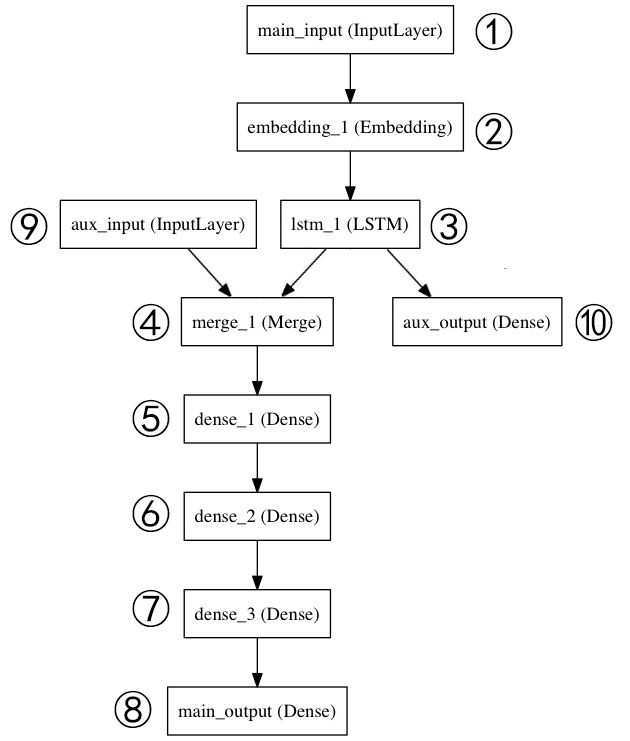

### 3.1 构建网络

这里我们选择函数方式模型(model),所以不需要提前实例化，先将网络结构实现

28.定义①，主要输入层，接收新闻标题本身，即一个整数序列（每个整数编码一个词）。  
这些整数在 1 到 10,000 之间（10,000 个词的词汇表），且序列长度为 100 个词。 命名main_input

In [ ]:
main_input = Input(shape = (100,),dtype ='int32',name = 'main_input')

29.定义②，将输入序列编码为一个稠密向量的序列，输出每个向量维度为 512。

In [ ]:
x = Embedding(output_dim = 512,input_dim = 10000,input_length = 100)(main_input)

30.定义③，LSTM 层把向量序列转换成单个向量，它包含整个序列的上下文信息，输出维度32

In [ ]:
lstm_out = LSTM(32)(x)

31.定义⑩，其作为辅助损失，使得即使在模型主损失很高的情况下，LSTM 层和 Embedding 层都能被平稳地训练。  
输出维度1，激活函数sigmoid，命名aux_output

In [ ]:
auxiliary_output = Dense(1,activation = 'sigmoid',name = 'aux_output')(lstm_out)

32.定义⑨，输入辅助数据，5维向量，命名aux_input

In [ ]:
auxiliary_input = Input(shape=(5,), name='aux_input')

33.定义④，将辅助输入数据与 LSTM 层的输出连接起来，输入到模型中

In [ ]:
x = keras.layers.concatenate([lstm_out,auxiliary_input])

34.定义⑤⑥⑦，堆叠多个全连接网络层，输出均为64维

In [ ]:
x = Dense(64,activation = 'relu')(x)

35.定义⑧，输出层，激活函数sigmoid，命名main_output

In [ ]:
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

### 3.2定义模型

36.定义一个具有两个输入和输出的模型

In [ ]:
model1 = Model(inputs = [main_input,auxiliary_input],outputs=[main_output,auxiliary_output])

### 3.3编译

37.编译模型，给辅助损失分配0.2的权重

In [ ]:
model1.compile(optimizer ='rmsprop',
               loss={'main_output':'binary_corssentropy','aux_output':'binary_crossentropy'},
              loss_weights = {'main_output':1,'aux_output':0.2})

### 3.4训练

编造一点数据

In [ ]:
headline_data = np.round(np.abs(np.random.rand(12, 100) * 100))
additional_data = np.random.randn(12, 5)
headline_labels = np.random.randn(12, 1)
additional_labels = np.random.randn(12, 1)

38.把数据送入模型训练

In [ ]:
model1.fit({'main_input':headline_data,'aux_input':additional_data},
           {'main_outpur':headline_labels,'aux_output':additional_labels},
           epoches = 50,batch_size =32,verbose = 0)

### 3.5预测

用训练好的模型进行预测

In [ ]:
model1.predict({'main_input':headline_data,'aux_input':additional_data})

## 四.模型的保存和读取

39.保存模型及权重

In [ ]:
model_json = model1.to_json()
json_file = open("model.json",'w')
json_file.write(model_json)
json_file.close()

model1.save_weights("model.h5")

40.读取模型及其权重

In [ ]:
from keras.models import model_from_json
# 读取模型
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# 读取权重
loaded_model.load_weights("model.h5")

In [ ]:
# 使用之前还需要编译一下
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2})